# Vehicle Collision Fatality Anaysis

### Introduction
Car crashes remain a leading cause of death in the United States, with over 40,000 annual fatalities. According to the National Safety Council (NSC), your chances of dying in a car crash are about one in 103 for any given year. In this project, I have analyzed variables that may lead to vehicle collision fatalities. I have completed a simple EDA and have outlined the next steps for a deeper analysis.

### Table of Contents
1. Import Packages and Data
2. Clean and Manipulate 
3. Exploratory Analysis
4. Conclusion

#### 1. Import Packages and Data

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in `road-accidents.csv`
crash= pd.read_csv('bad-drivers.csv', comment='#', sep=',')

# Save the number of rows columns as a tuple
rows_and_cols = crash.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

# Generate an overview of the DataFrame
crash_info = crash.info()
print(crash_info)

# Display the last five rows of the DataFrame
crash.head()



There are 51 rows and 8 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   State                                                                                                   51 non-null     object 
 1   Number of drivers involved in fatal collisions per billion miles                                        51 non-null     float64
 2   Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                    51 non-null     int64  
 3   Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                            51 non-null     int64  
 4   Percentage Of Drivers Involved In Fatal Collisions Who Were N

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


#### 2. Cleaning & Manipulation

In [8]:
#null values
print(crash.isna().sum())
#duplicated values
crash.duplicated('State').unique()

State                                                                                                     0
Number of drivers involved in fatal collisions per billion miles                                          0
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                      0
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                              0
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                0
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents    0
Car Insurance Premiums ($)                                                                                0
Losses incurred by insurance companies for collisions per insured driver ($)                              0
dtype: int64


array([False])

In [9]:
crash=crash.rename(columns={"Number of drivers involved in fatal collisions per billion miles": "Fatal_(per_bill_m)", "Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding": "perc_Speeding","Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired":"perc_Alcohol","Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted":"perc_Not_Distracted","Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents":"perc_First_Crash","Car Insurance Premiums ($)":"Car_premiums","Losses incurred by insurance companies for collisions per insured driver ($)":"Ins_Loss"})
crash.head()

,State,Fatal_(per_bill_m),perc_Speeding,perc_Alcohol,perc_Not_Distracted,perc_First_Crash,Car_premiums,Ins_Loss
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [10]:
cf= crash.drop(['State','Car_premiums','Ins_Loss'], axis=1)
cf_col=cf.columns

#### 3. Exploratory Analysis

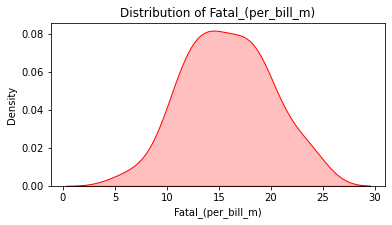

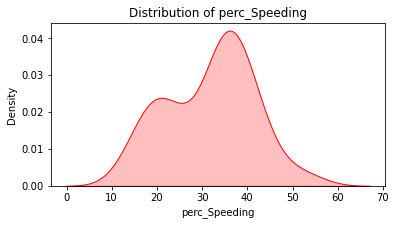

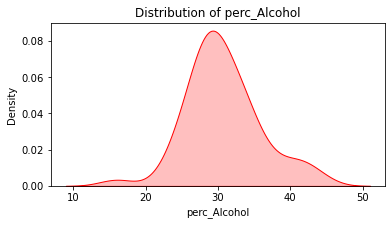

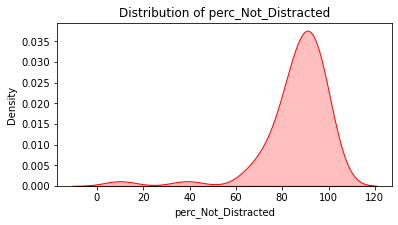

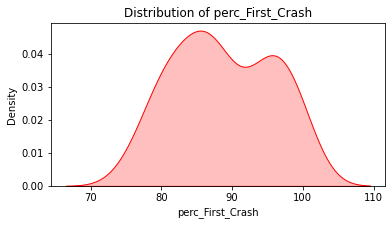

In [11]:
# Find distributions of the continuous features

def plot_dist(crash,cont):
    for x in cont:
        plt.figure(figsize=(6,3))
        sns.kdeplot(crash[x], legend=False, color="red", shade=True)
        plt.title("Distribution of "+x)
        plt.show()
        
plot_dist(crash,cf_col)

#### Findings:
- All features are normally distributed except not_distracted which skews left.
- median gives a more accurate measure of center for not_distracted

In [12]:
# Compute the summary statistics of all columns in the `car_acc` DataFrame
cf_sum = cf.describe()
print(cf_sum)

       Fatal_(per_bill_m)  perc_Speeding  perc_Alcohol  perc_Not_Distracted  \
count           51.000000      51.000000     51.000000            51.000000   
mean            15.790196      31.725490     30.686275            85.921569   
std              4.122002       9.633438      5.132213            15.158949   
min              5.900000      13.000000     16.000000            10.000000   
25%             12.750000      23.000000     28.000000            83.000000   
50%             15.600000      34.000000     30.000000            88.000000   
75%             18.500000      38.000000     33.000000            95.000000   
max             23.900000      54.000000     44.000000           100.000000   

       perc_First_Crash  
count          51.00000  
mean           88.72549  
std             6.96011  
min            76.00000  
25%            83.50000  
50%            88.00000  
75%            95.00000  
max           100.00000  


In [13]:
cf_corr=cf.corr()
cf_corr

,Fatal_(per_bill_m),perc_Speeding,perc_Alcohol,perc_Not_Distracted,perc_First_Crash
Fatal_(per_bill_m),1.000000,-0.029080,0.199426,0.009782,-0.017942
perc_Speeding,-0.029080,1.000000,0.286244,0.131738,0.014066
perc_Alcohol,0.199426,0.286244,1.000000,0.043380,-0.245455
perc_Not_Distracted,0.009782,0.131738,0.043380,1.000000,-0.195265
perc_First_Crash,-0.017942,0.014066,-0.245455,-0.195265,1.000000


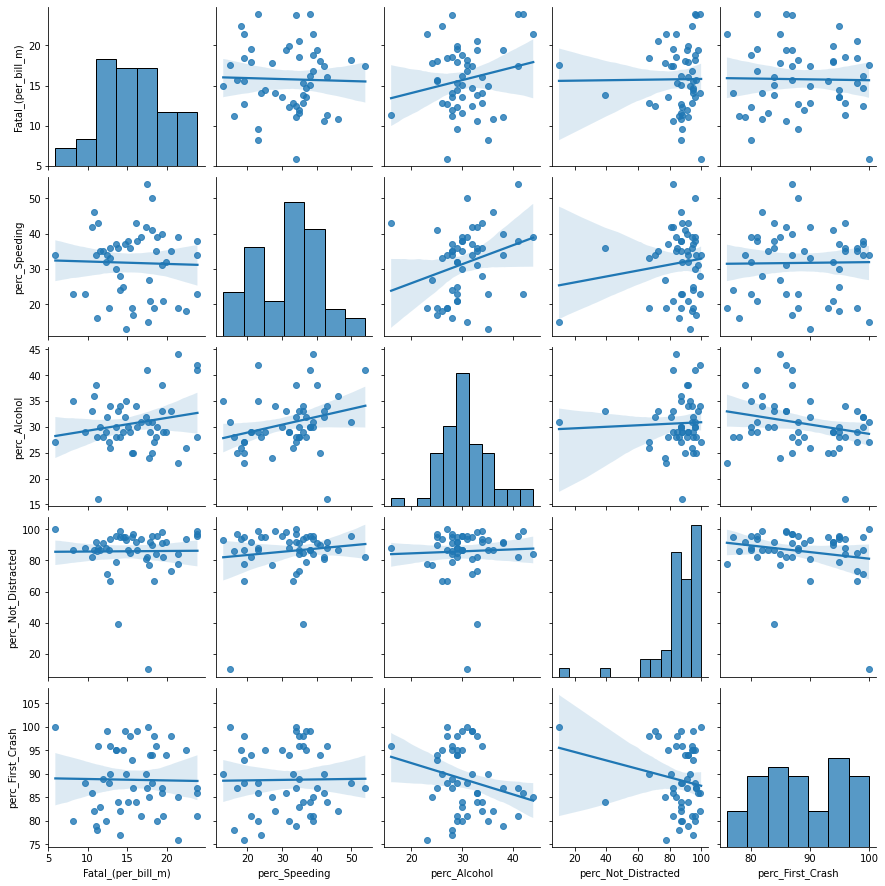

In [14]:
# Create a pairwise scatter plot to explore the data
sns.pairplot(cf, kind='reg')
plt.show()


In [27]:
highest= cf['perc_Alcohol'].max()
lowest= cf['perc_Alcohol'].min()
cf[]


In [96]:
avg=crash['perc_Alcohol'].mean()
low=crash[['State', 'perc_Alcohol']].sort_values('perc_Alcohol').head(1)
high=crash[['State', 'perc_Alcohol']].sort_values('perc_Alcohol', ascending=False).head(1)
print(avg, low, high)

30.686274509803923    State  perc_Alcohol
44  Utah            16       State  perc_Alcohol
26  Montana            44


#### Findings:
- Alcohol has the highest correlation with fatalities
- All other features have very low correlation with fatalities
- Speeding has a moderate positive correlation with Alcohol and first_crash has moderate negative correlation with Alcohol
- National Average of alcohol related fatal collision is 31%, Montana (44%) is highest, Utah (16%) is lowest

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


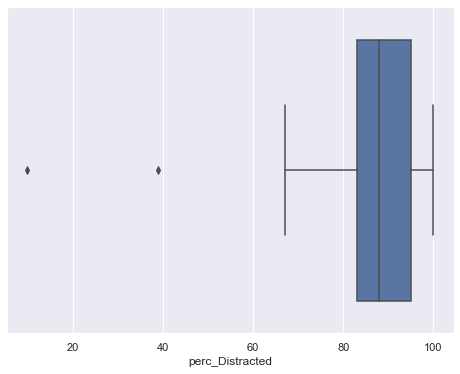

In [289]:
#Non-distracted drivers Boxplot analysis
plt.figure(figsize=(8,6))
sns.boxplot(crash['perc_Distracted'])

plt.show()

#### Findings:
- Non_distracted drivers IQR is between 83% and 95% for not_distracted
- The median is 88%

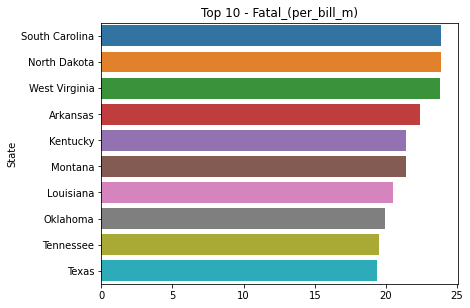

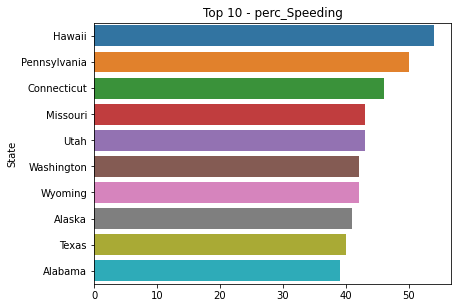

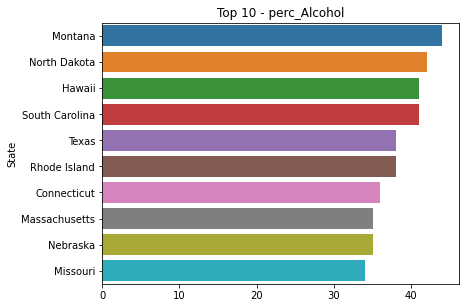

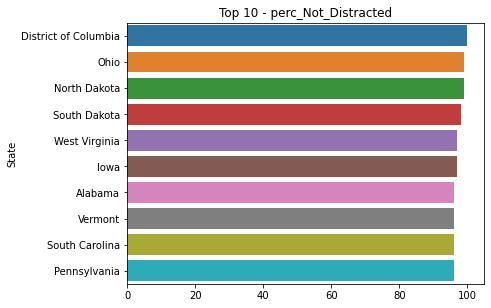

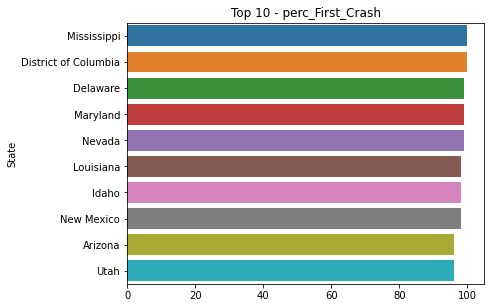

In [97]:
# Top 10 states for continuous features

def top_10(crash, cont):
    for x in cont:
        z = crash[["State",x]].sort_values(by=x,ascending=False).head(10)
        plt.figure(figsize=(6.4,4.8))
        sns.barplot(y='State', x=x, data=z)
        plt.title("Top 10 - "+x)
        plt.xlabel('')
        plt.show()
        

top_10(crash, cf_col)

#### 4. Conclusion:
    
Alcohol has the highest correlation with fatal car collisions out of all features. The state with the most fatalities per billion miles is South Carolina. Montana has the highest percentage of alcohol-related fatalities. 
The average alcohol-related fatality is 31%, the highest is 44%, and the lowest is 16%.
Montana is 13% above the national average and 28% above the state (Utah) with the lowest alcohol-related fatalities.
The high percentage of fatalities (88% average) involve drivers who are not distracted.
The first crash was fatal for 89% of all people involved in collisions across the us.

### Next steps: 
- Cluster analysis to find statistical similarities across states 
- Collect data on miles driven in each state to find total fatalities
- Use new data to build models and conduct a predictive analysis
